In [16]:
%pip install dgl -f https://data.dgl.ai/wheels/repo.html

Looking in links: https://data.dgl.ai/wheels/repo.html

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
import dgl.geometry
import numpy as numpy
import pandas as pd 
import matplotlib.pyplot as plt
import torch
from dgl.geometry import farthest_point_sampler

In [18]:
data = pd.read_csv('./data/lattice_2d_sample.csv', usecols=['C11', 'C12', 'C22', 'C16', 'C26', 'C66'])

In [57]:
def toTensor(data): 
    a = torch.tensor(data.values)
    a.unsqueeze(-1)
    a = a.expand(1, data.shape[0], data.shape[1])
    return a

In [70]:
def draw(data, point_idx): 
    x = data['C11']
    y = data['C12']
    plt.scatter(x,y)
    for index in point_idx: 
        plt.scatter(x[index], y[index], color='red')

In [66]:
point_idx = farthest_point_sampler(toTensor(data), 10)
point_idx = point_idx.tolist()

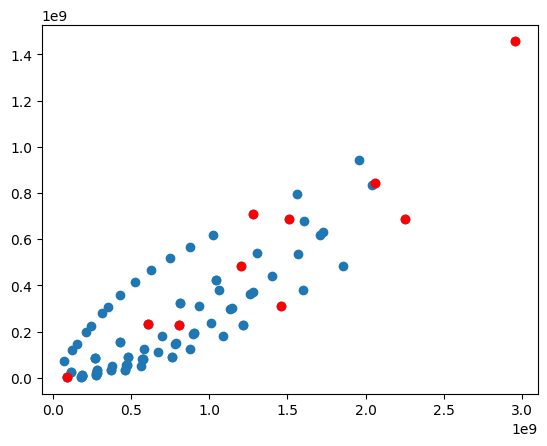

In [69]:
draw(data, point_idx)

In [71]:
subset = data.sample(50, ignore_index=True)

In [72]:
point_idx_2 = farthest_point_sampler(toTensor(subset), 10).tolist()

In [73]:
point_idx_2

[[6, 33, 4, 36, 41, 2, 30, 20, 5, 39]]

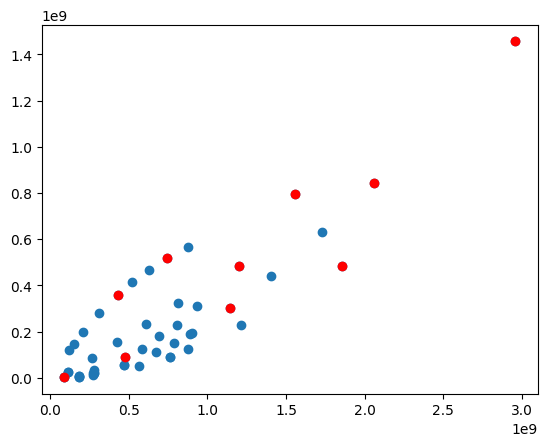

In [74]:
draw(subset, point_idx_2)

In [79]:
subset = subset.sample(20, ignore_index=True)

In [83]:
point_idx_3 = farthest_point_sampler(toTensor(subset), 10).tolist()

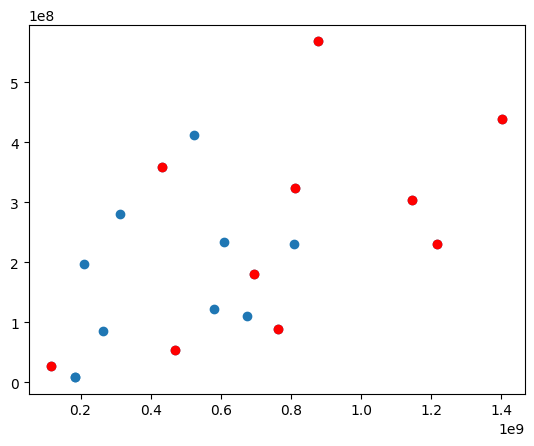

In [84]:
draw(subset, point_idx_3)

In [89]:
free = pd.read_csv('/Users/yujiaxie/Downloads/freeform_2d.csv', usecols=['C11', 'C12', 'C22', 'C16', 'C26', 'C66'])

In [93]:
free.shape

(78958, 6)

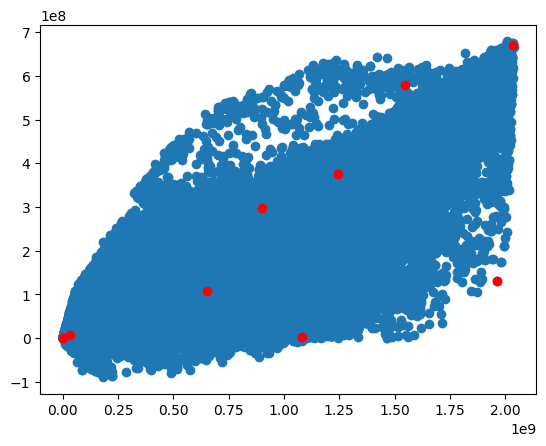

In [92]:
point_idx = farthest_point_sampler(toTensor(free), 10).tolist()
draw(free, point_idx)

In [96]:
point_idx

[[58724, 37373, 45745, 47696, 58245, 938, 7102, 50648, 965, 52232]]

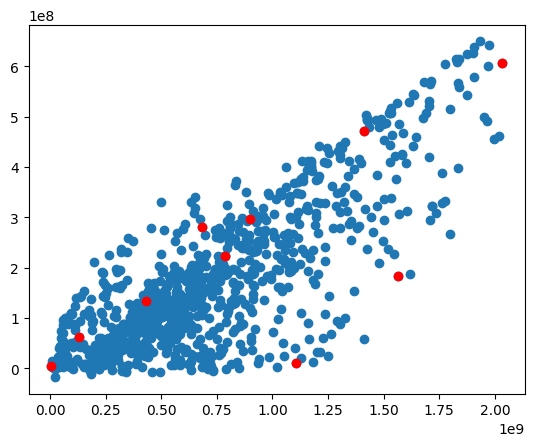

In [101]:
subset = free[47000:48000]
subset = subset.reset_index()
point_idx = farthest_point_sampler(toTensor(subset), 10, 696).tolist()
draw(subset, point_idx)

In [102]:
point_idx

[[696, 269, 1, 187, 668, 575, 836, 702, 801, 324]]